In [2]:
%matplotlib inline
import numpy as np
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn
import mglearn

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)

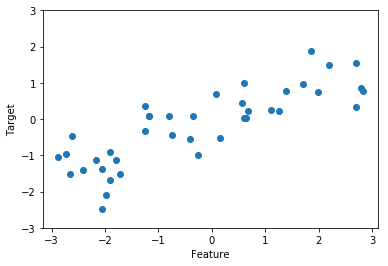

In [5]:
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

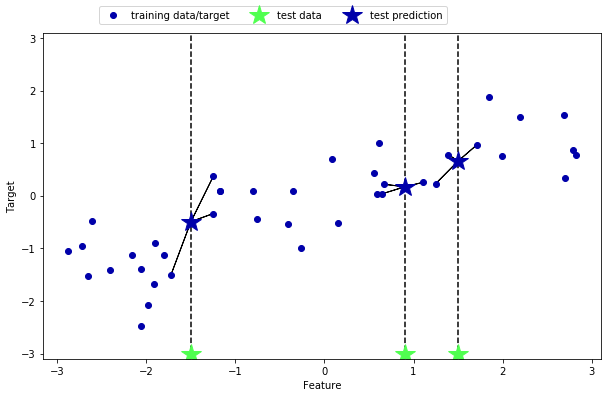

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [11]:
print("Test set R^2: \n{:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 
0.83


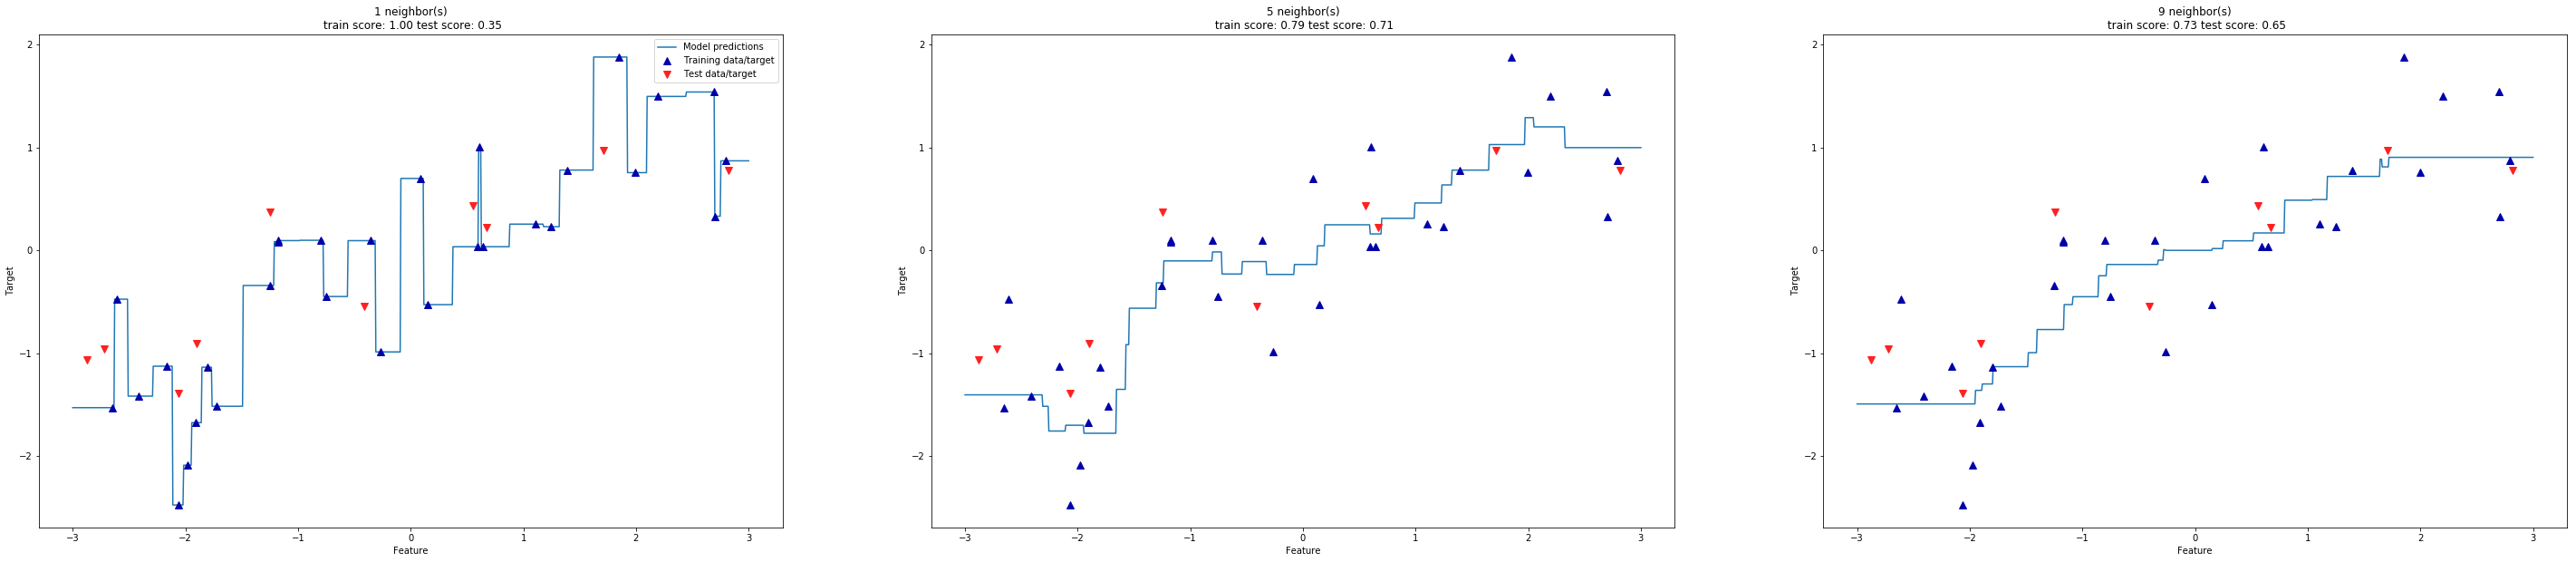

In [16]:
fig, axes = plt.subplots(1,3, figsize=(50,10))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,5,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train,y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
taxes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

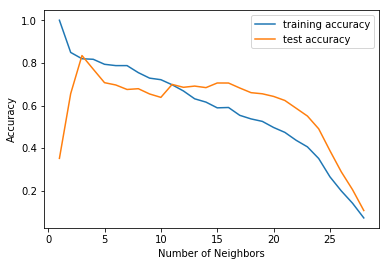

In [29]:
train_acc=[]
test_acc=[]
n_neigh_set = range(1,29)

for n_neighbors in n_neigh_set:
    knn_mo = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_mo.fit(X_train,y_train)
    train_acc.append(knn_mo.score(X_train,y_train))
    test_acc.append(knn_mo.score(X_test,y_test))

plt.plot(n_neigh_set, train_acc, label="training accuracy")
plt.plot(n_neigh_set, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.legend()

w[0]: 0.393906  b: -0.031804


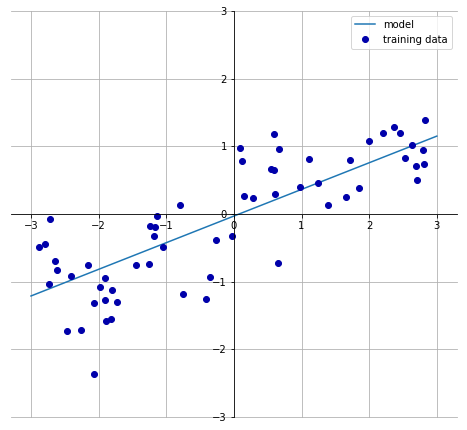

In [30]:
mglearn.plots.plot_linear_regression_wave()

In [38]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)
print("Coefficient: {:.4f}".format(lr.coef_[0]))
print("Intercept: {:.4f}".format(lr.intercept_))
print("Training score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test score: {:.2f}".format(lr.score(X_test,y_test)))

Coefficient: 0.3939
Intercept: -0.0318
Training score: 0.67
Test score: 0.66
